Create a HOME directory

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLO11 via Ultralytics

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


Download the dataset version by using the API KEY and code provided by Roboflow. Make sure that, when exporting, the YOLOv11 format is selected.

In [ ]:
import os
HOME2 = os.getcwd()

!mkdir {HOME2}/datasets
%cd {HOME2}/datasets


!pip install roboflow

from roboflow import Roboflow

# This code is generated by Roboflow when you try to download your dataset version, so make sure you get the correct code for your example
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("first-workspace-08mci").project("rock-paper-scissors-d65tl")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-1 in yolov11:: 100%|██████████| 16816/16816 [00:02<00:00, 7106.12it/s]


Fine-tune the hyperparameters and train the model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml lr0=0.01 batch=16 epochs=10 imgsz=640 plots=True

/content
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Rock-Paper-Scissors-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

The results of the training are saved in the `{HOME}/runs/detect/train/` folder

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1731355958.ffdb5e2ece0c.2334.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


This is the confusion matrix:

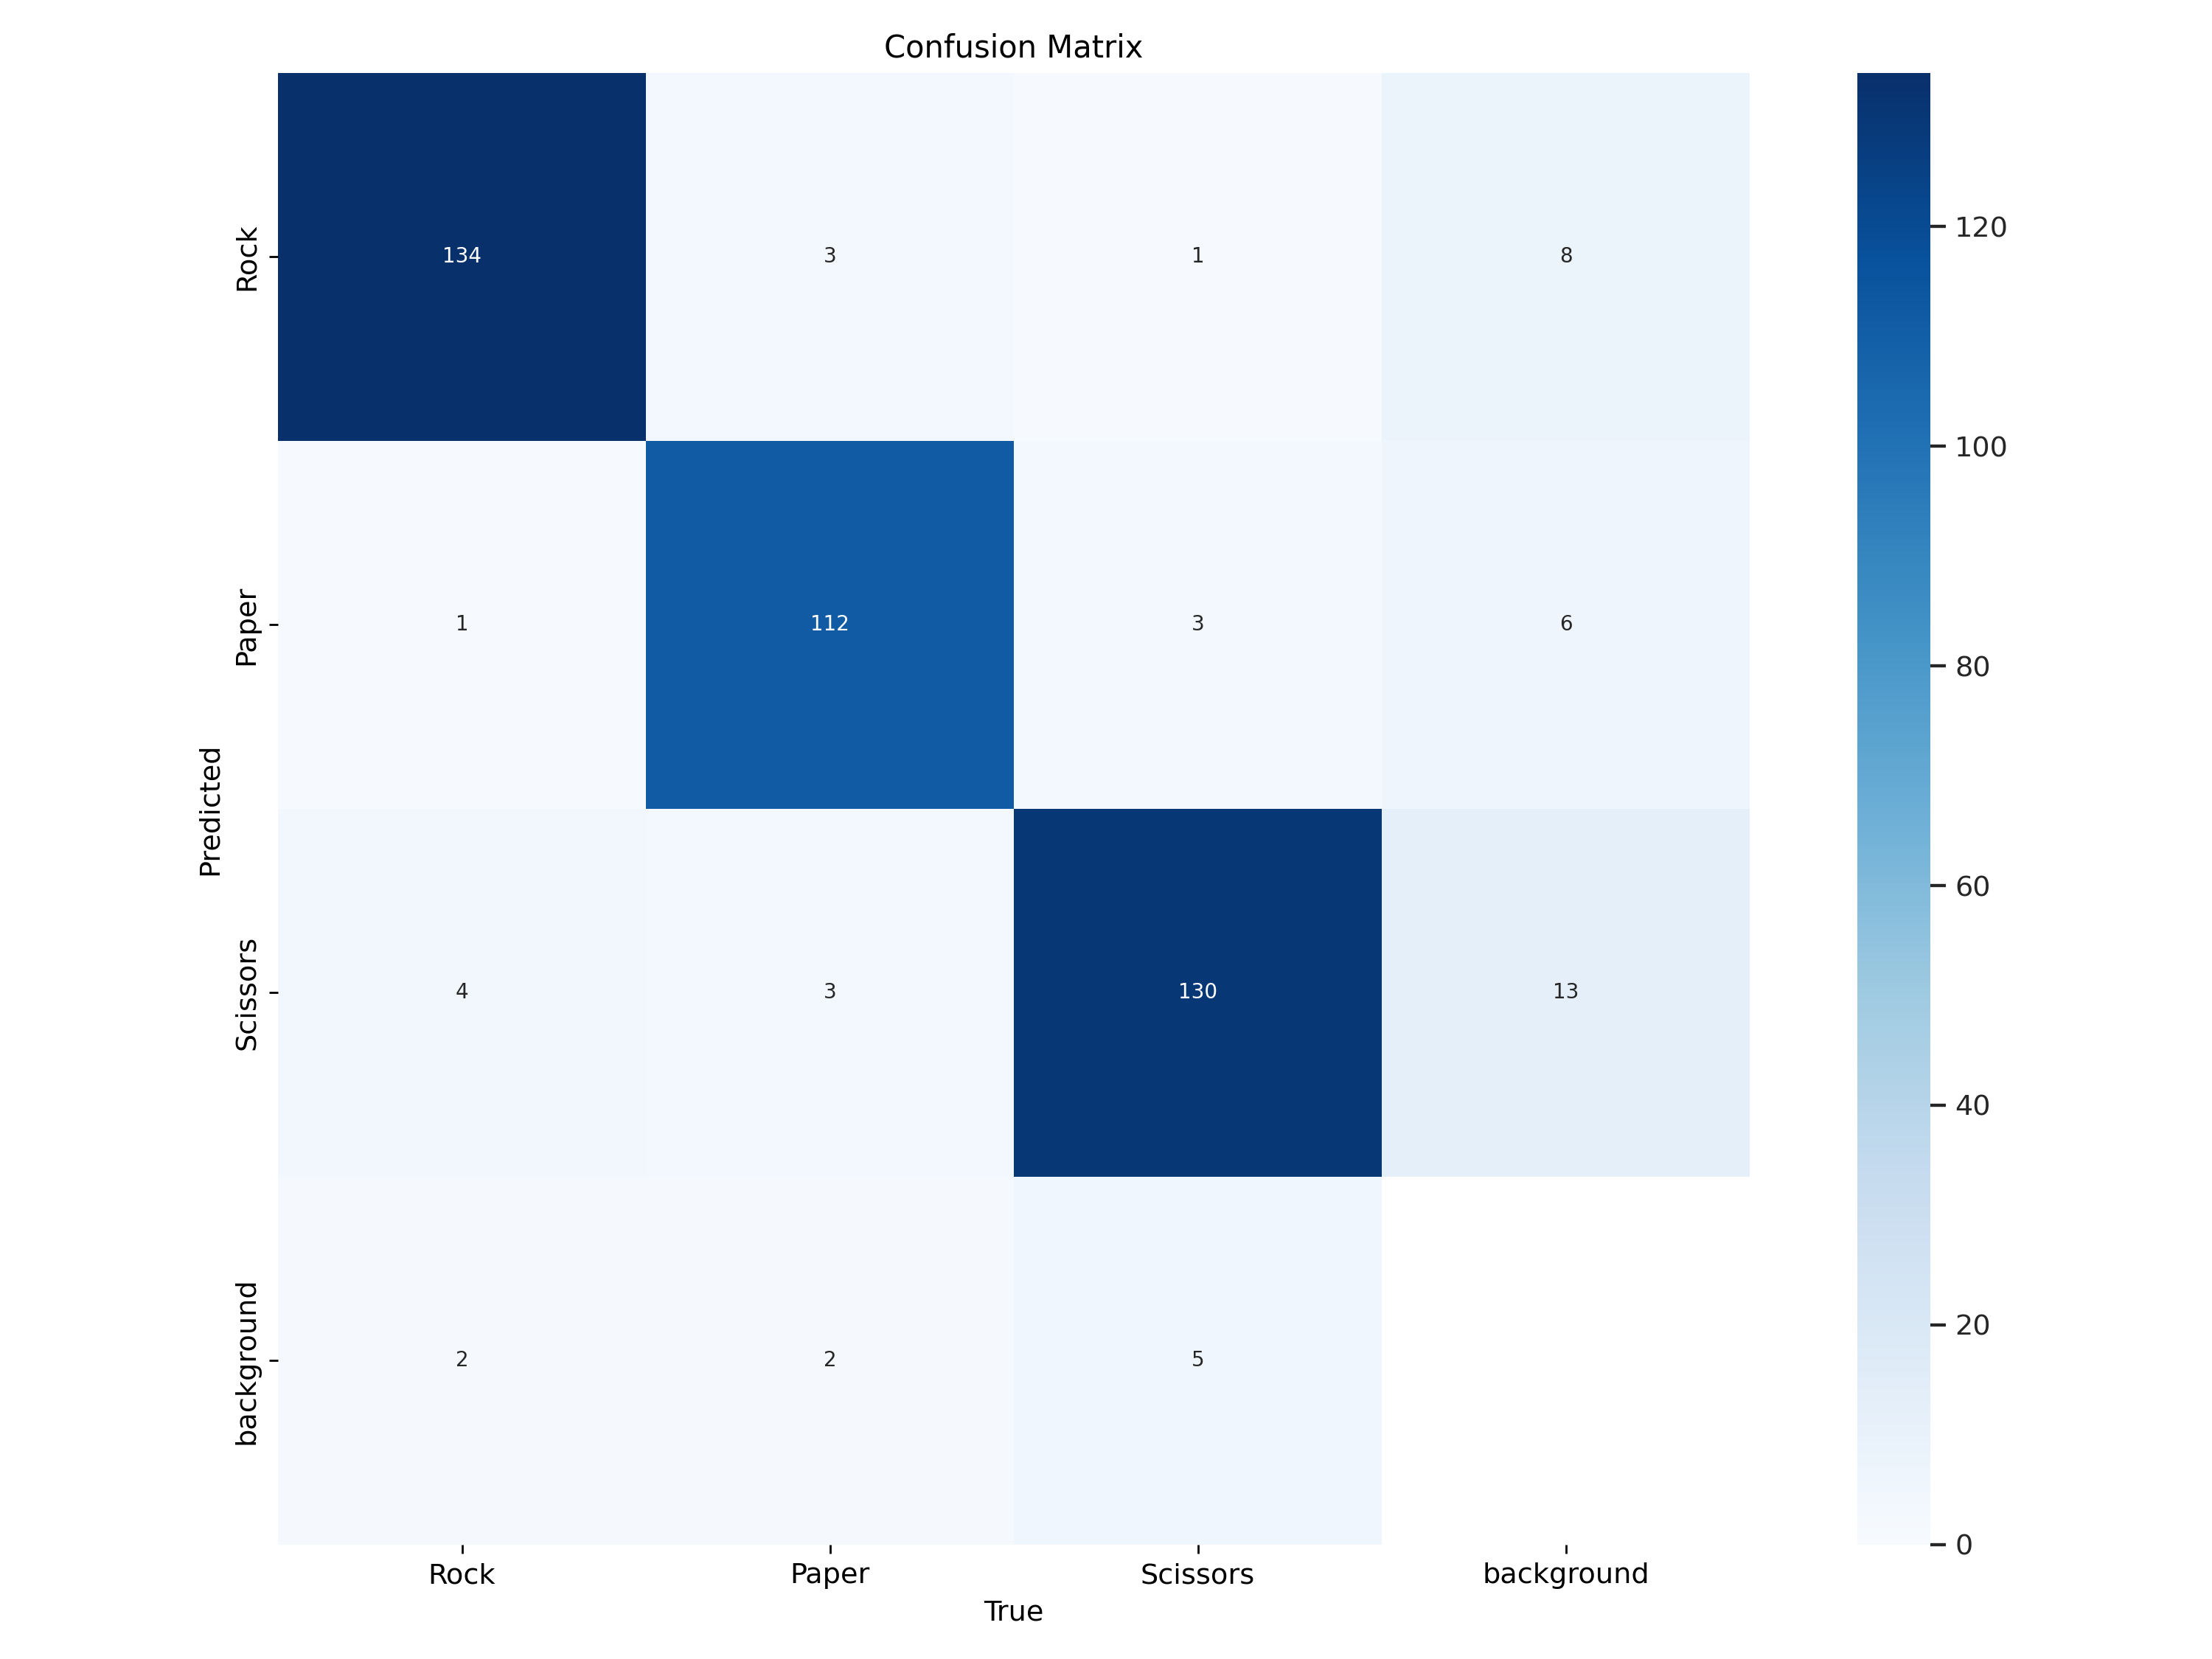

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1600)

Deploy the newly trained model

In [ ]:
!project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")